#**Project Title : Mobile Price Range Prediction**


##### **Name**    - Aniket Abhit Jadhav
##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**


The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors, including battery power, Bluetooth, camera quality, screen size, and more. In this context, a study was conducted to understand the factors influencing the price range of mobile phones. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

The first step in the analysis involved data wrangling, where missing values were handled and unique values were checked. The study identified that 180 phones had pixel resolution height as 0 and two phones had screen width in cm as 0. The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, the study replaced these 0 values with the mean values, ensuring that no missing values were left in the dataset.

Next, the study performed exploratory data analysis (EDA), which revealed that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. The study found that almost half the devices had Bluetooth, and half did not.

The scatter plot showed a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This indicated that as the price range increased, the amount of RAM in the device generally increased as well. The study also found that the count of devices with dual sim was increasing for the very high price range. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones.

The analysis of the screen size distribution among different target categories indicated that there was not a significant difference in the distribution, suggesting that screen size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that screen size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories. The study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

After the EDA, the study performed hypothesis testing on three statements and handled outliers. The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. The study then performed feature engineering and implemented machine learning models such as logistic regression, random forest, and XGBoost. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In conclusion, the study found that the mobile phones in the dataset were divided into four different price ranges, each having a similar number of elements. Additionally, the study found that approximately half of the devices had Bluetooth, while the other half did not. Furthermore, the study found that as the price range increased, there was a gradual increase in battery power, and RAM showed continuous growth from low-cost to very high-cost phones. Moreover, the study found that the costly phones tend to be lighter than the lower-priced ones.

The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Finally, the study found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performance in predicting the price range of mobile phones.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

Github link :- https://github.com/Aniketj777/Mobile_Price_Range_Prediction

##**Lets Starts**

##Step 1:

# **Understanding Data**

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loadind dataset:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading file

df = pd.read_csv("/content/drive/MyDrive/Alma Better/Capstone project/Ml - Supervised (Classification)/Mobile Price Range Prediction/Dataset/data_mobile_price_range.csv")

#Showing first 5 rows and all the columns of the dataset

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Showing last 5 rows and all the columns of the dataset

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# check the total number of rows and columns

df.shape

(2000, 21)

In [ ]:
# Checking for the columns name

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Describe

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# Getting info of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

from the above we get that we only have numerical values available in our data

In [ ]:
# Lets check for the total number of null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

From the above information we can say that we do not have any null values present in our data

**Observations About Dataset :**

1. The dataset contains 21 columns and 2000 rows

2. No duplicate values present in the dataset.

3. No missing values present in the dataset.

##Step 2:


##**Understanding Variables**

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# lets check the length of our columns

len(df.columns)

21

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description


**Battery_power** - Total energy a battery can store in one time measured in mAh.

**Blue** - Has bluetooth or not.

**Clock_speed** - speed at which microprocessor executes instructions.

**Dual_sim** - Has dual sim support or not.

**Fc** - Front Camera mega pixels.

**Four_g** - Has 4G or not.

**Int_memory** - Internal Memory in Gigabytes.

**M_dep** - Mobile Depth in cm.

**Mobile_wt** - Weight of mobile phone.

**N_cores** - Number of cores of processor.

**Pc** - Primary Camera mega pixels.

**Px_height** - Pixel Resolution Height.

**Px_width** - Pixel Resolution Width.

**Ram** - Random Access Memory in Mega.

**Touch_screen** - Has touch screen or not.

**Wifi** - Has wifi or not.

**Sc_h** - Screen Height of mobile in cm.

**Sc_w** - Screen Width of mobile in cm.

**Talk_time** - longest time that a single battery charge will last when you are.

**Three_g** - Has 3G or not.

**Wifi** - Has wifi or not.

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

##Step 3:


#**Data Wrangling**

In [ ]:
# Checking for unique values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

So here can see that there are no uniques values like 0 or 1 so we do not need to remove any columns

In [ ]:
# lets check values present in "sc_w" and "sc_h"
df['sc_h'].value_counts()

17    193
12    157
7     151
16    143
14    143
15    135
13    131
11    126
10    125
9     124
19    124
18    120
8     117
6     114
5      97
Name: sc_h, dtype: int64

In this we come to come know there not an single 0 value

In [ ]:
df['sc_w'].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

So here we come to know that we have change the value having 0 to the mean value of the columns

In [ ]:
sc_w_mean = df['sc_w'].mean()
sc_h_mean = df['sc_h'].mean()

In [ ]:
# count number of phones with px_height = 0
# count number of phones with px_height = 0
# And convert them into the mean values of there columns


df['sc_w'] = np.where(df['sc_w']==0, sc_w_mean, df['sc_w'])
df['sc_h'] = np.where(df['sc_h']==0, sc_h_mean, df['sc_h'])

We convert all the 0 values to the mean of the columns

In [ ]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11.0,2.0,9,1,1,0,2


In [ ]:
# lets check for duplicates values
df.duplicated().sum()

0

So now we dont have duplicate values

**Observations**

**1**.I have found that number of phones with pixel resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.

**2**.The minimum value of px_height and sc_weidth should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

**3**.So the 0 values are replaced with the mean values and no missing values left in the table so our data is ready for data analysis!.

Now our data is ready for EDA !!!

#**4 - Exploratory Data Analysis (EDA) and Visualization Techniques**

**1). Price Range**

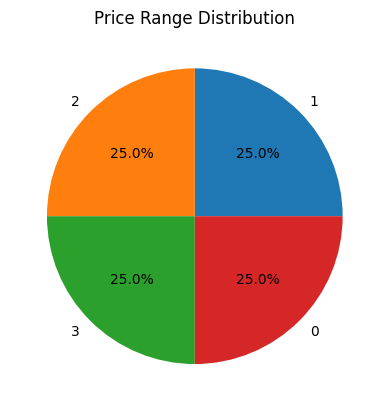

In [ ]:
price_count = df['price_range'].value_counts()
plt.pie(price_count, labels=price_count.index, autopct="%1.1f%%")
plt.title("Price Range Distribution")
plt.show()

From the above pie plot we can say that each price have equal distribution

**2).Battery Power**

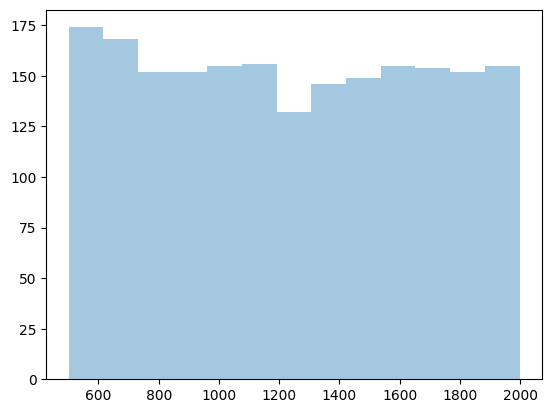

In [ ]:
sns.distplot(x=df['battery_power'], kde=False)
plt.show()

* This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

* The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact. If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost, they may be able to attract more customers and generate more revenue by offering phones at higher price points. Additionally, this information can also inform marketing and advertising efforts, as companies can use this insight to highlight the battery capacity of their phones as a key selling point to potential customers.

**3).Buletooth**

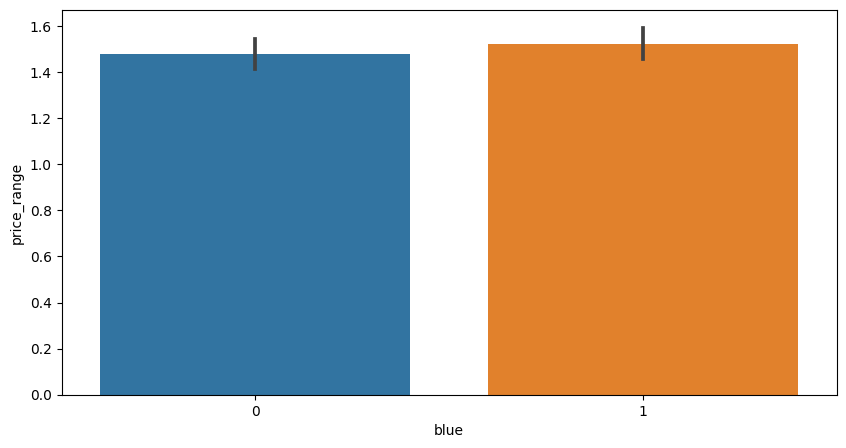

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='blue', y='price_range', data=df)
plt.show()

So as per our data we come to know that half of the device has bluethooth and half have not.

The observation that almost half of the devices in the dataset have Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.

On the other hand, this observation could also have negative consequences if a company misinterprets or misuses this information. For instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.

**4).RAM**

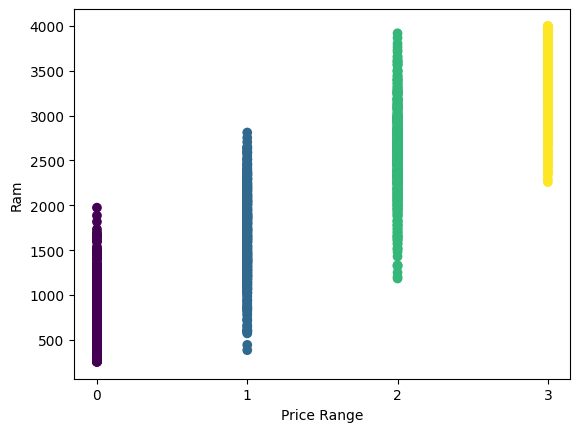

In [ ]:
plt.scatter(x = df['price_range'], y= df['ram'], c = df['price_range'])
plt.ylabel('Ram')
plt.xlabel('Price Range')
plt.xticks([0,1,2,3])
plt.show()

From the above scatter plot we see that Ram and price range column has positive correlation, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

The insights gained from the scatter plot, such as the positive correlation between RAM and price range, can be valuable for businesses. For example, businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increased revenue and profits.

**5)Dual Sim**

Text(0.5, 1.0, 'No of dual sim devices by price range')

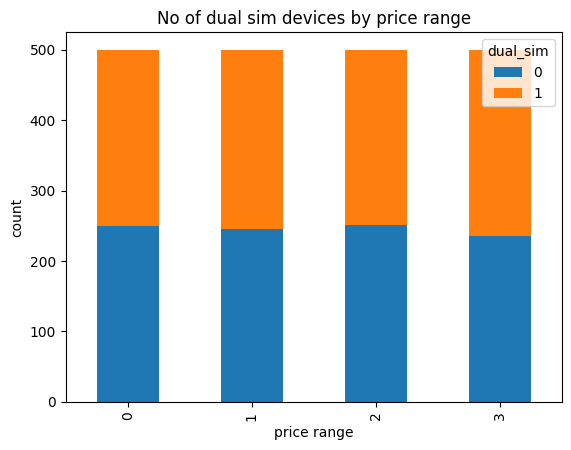

In [ ]:
# Group the bt dual sim , price range
sim_count = df.groupby(['price_range','dual_sim'])['dual_sim'].count().unstack()

# plot the stacked plot of the dual sim card for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis and label
plt.xlabel('price range')
plt.ylabel('count')
plt.title("No of dual sim devices by price range")


We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

In [ ]:
df.groupby(['price_range','four_g'])['four_g'].count().unstack()

four_g,0,1
price_range,,
0,241,259
1,238,262
2,253,247
3,225,275


**6) Four_g**

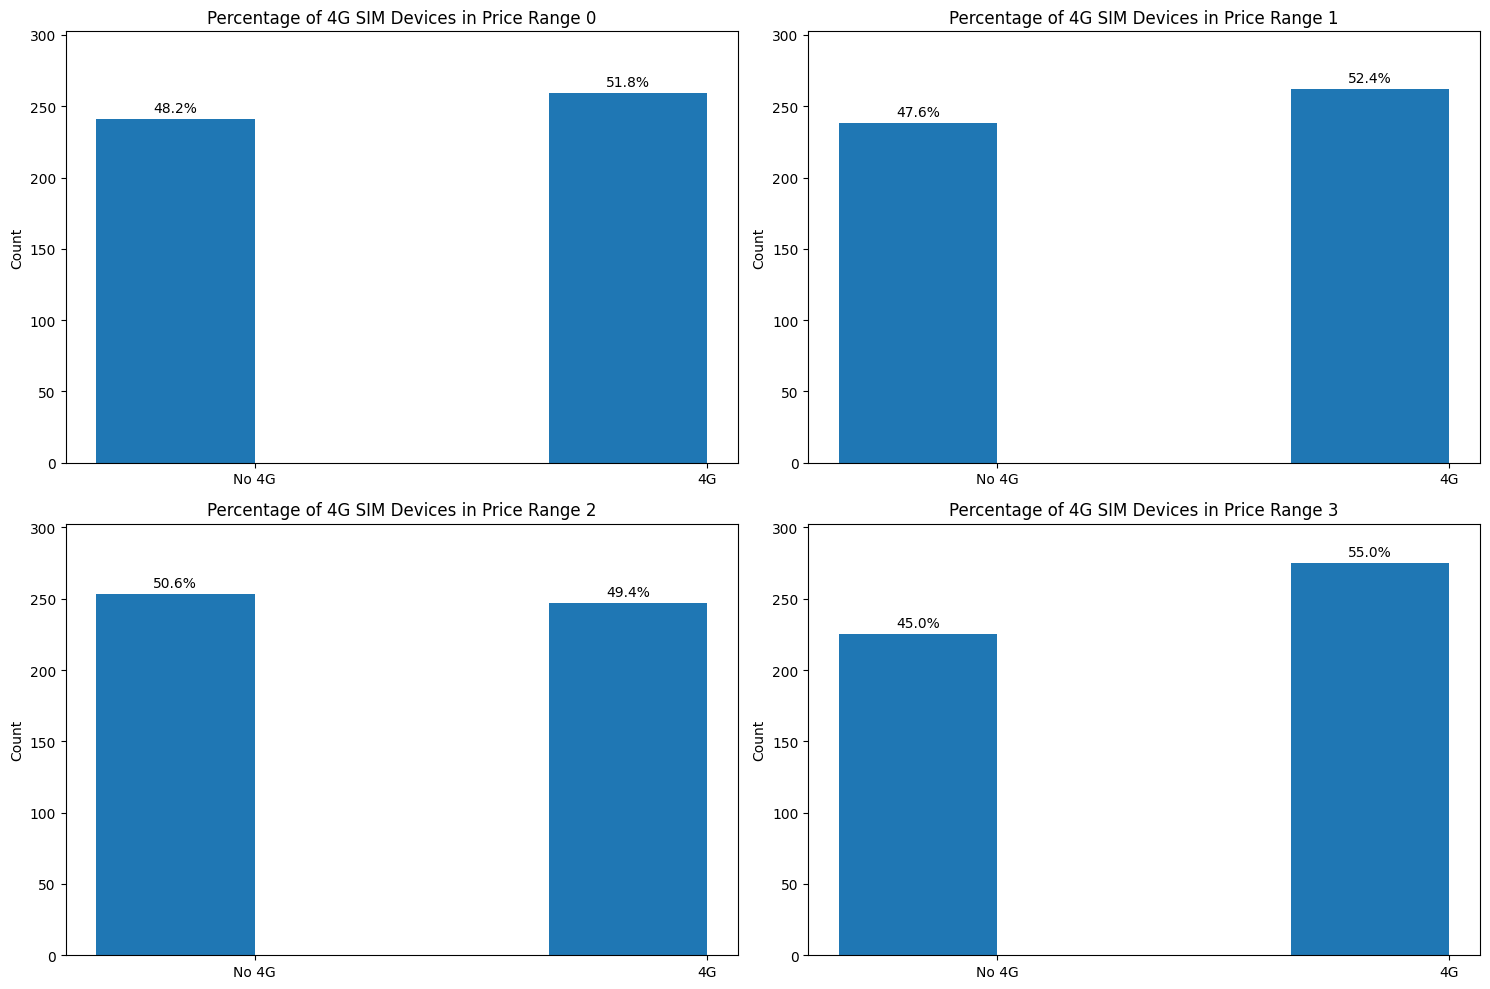

In [ ]:
# Group the data by price range and four_g column, and count the number of device in each group

fourg_count = df.groupby(['price_range','four_g'])['four_g'].count().unstack()

# Create a price range chat
Labels = ['No 4G', '4G']
x = np.arange(len(Labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(Labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


* I have found that at low, medium,very high prices the mobile phones having sim in more numbers but at high prices it is showing slightly collapse.

* The insights gained from the analysis of the number of SIM cards in mobile phones at different price ranges can be helpful in creating a positive business impact. For example, if a company wants to introduce a new product in a specific price range, they can use this information to determine whether their target market prefers phones with a single SIM or dual SIM, and adjust their product accordingly.

* However, the slight collapse in the number of SIM cards at high prices may suggest that consumers at that price range prioritize other features over having multiple SIM cards. This insight can be negative for companies that primarily focus on providing phones with multiple SIM cards. It may be necessary for such companies to reconsider their strategy and consider other features that consumers in the high price range prioritize

**7) Pixel Width and Height**

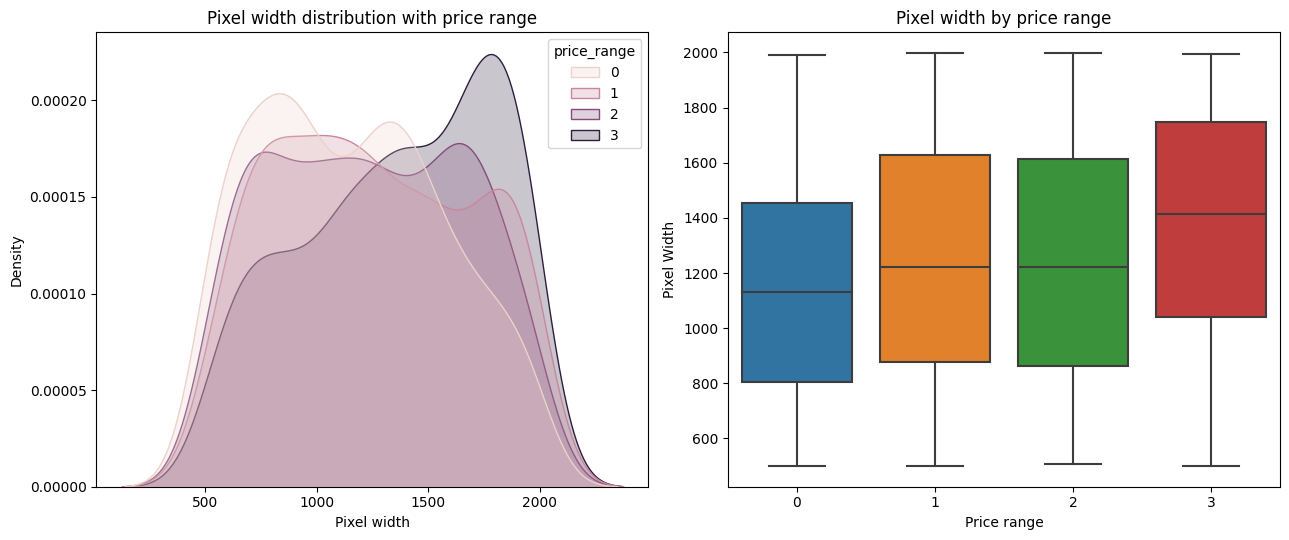

In [ ]:
#Pixel Width

fig,axs = plt.subplots(1,2, figsize=(13,5.5))
# Create a density estimate for the pixel with distribution

# Plot charts on pixel width for each price range
sns.kdeplot(x='px_width', hue = 'price_range',fill=True, data=df, ax=axs[0])
sns.boxplot(x='price_range', y='px_width', data=df, ax=axs[1])

# Add labels to charts

axs[0].set_xlabel("Pixel width")
axs[0].set_ylabel("Density")
axs[0].set_title("Pixel width distribution with price range")

axs[1].set_xlabel("Price range")
axs[1].set_ylabel("Pixel Width")
axs[1].set_title("Pixel width by price range")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


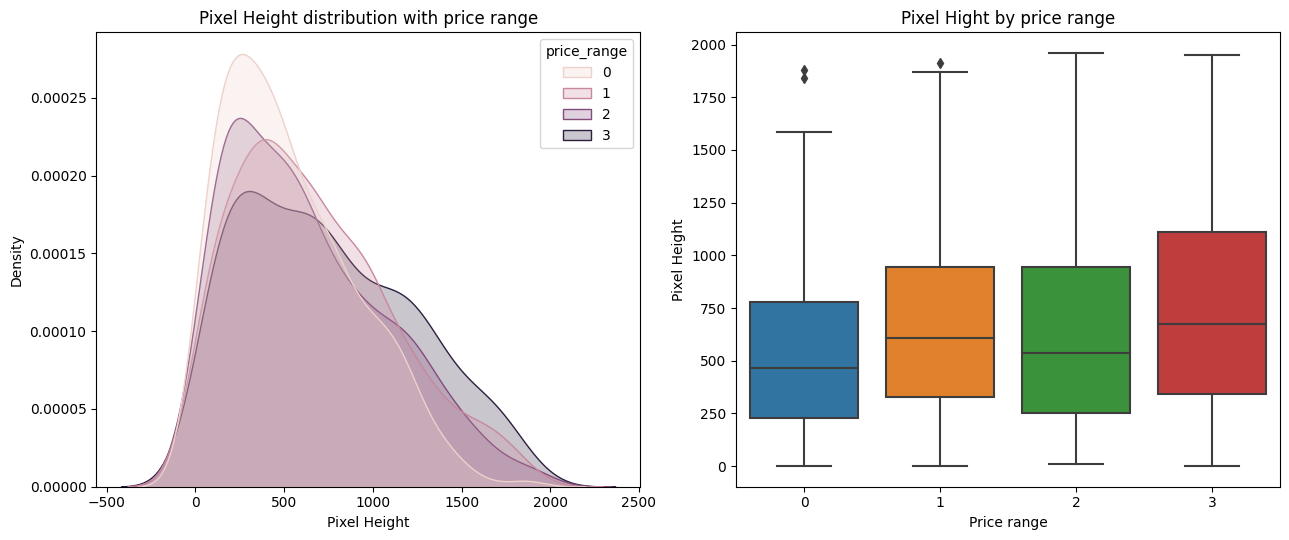

In [ ]:
#Pixel Height

fig,axs = plt.subplots(1,2, figsize=(13,5.5))
# Create a density estimate for the pixel with distribution

# Plot charts on pixel width for each price range
sns.kdeplot(x='px_height', hue = 'price_range', data=df, fill =True, ax=axs[0])
sns.boxplot(x='price_range', y='px_height', data=df, ax=axs[1])

# Add labels to charts

axs[0].set_xlabel("Pixel Height")
axs[0].set_ylabel("Density")
axs[0].set_title("Pixel Height distribution with price range")

axs[1].set_xlabel("Price range")
axs[1].set_ylabel("Pixel Height")
axs[1].set_title("Pixel Hight by price range")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

**8) FC (Front camera megapixel)**

Text(0.5, 1.0, 'Front Camera megapixel vs ')

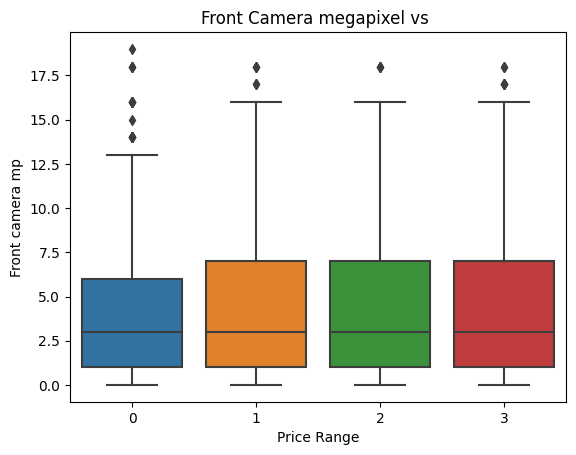

In [ ]:
# Creating a boxplot from camera megapixel groupy by price range
sns.boxplot(x ='price_range', y='fc', data=df)

# Add x and y axis label and tites
plt.xlabel("Price Range")
plt.ylabel("Front camera mp")
plt.title("Front Camera megapixel vs ")

It has almost same impact of price range in all categories.

The distribution of front camera megapixels is similar across all price ranges suggests that this feature alone may not be a helpful predictor of price range. However, this does not necessarily mean that the insights gained from this analysis cannot create a positive business impact.

For example, understanding the limitations of certain features in predicting price range can inform the development of more accurate models that consider multiple features simultaneously. This can lead to better pricing strategies and more effective product positioning, ultimately resulting in increased revenue and growth.

On the other hand, if a company relied solely on front camera megapixels to determine pricing, this could lead to negative growth if competitors offered more advanced features that customers value more highly. Therefore, it is important for businesses to consider multiple factors and stay up-to-date with evolving customer preferences and technological advancements in order to remain competitive in the market.

**9) PC (Primary camera megapixel)**

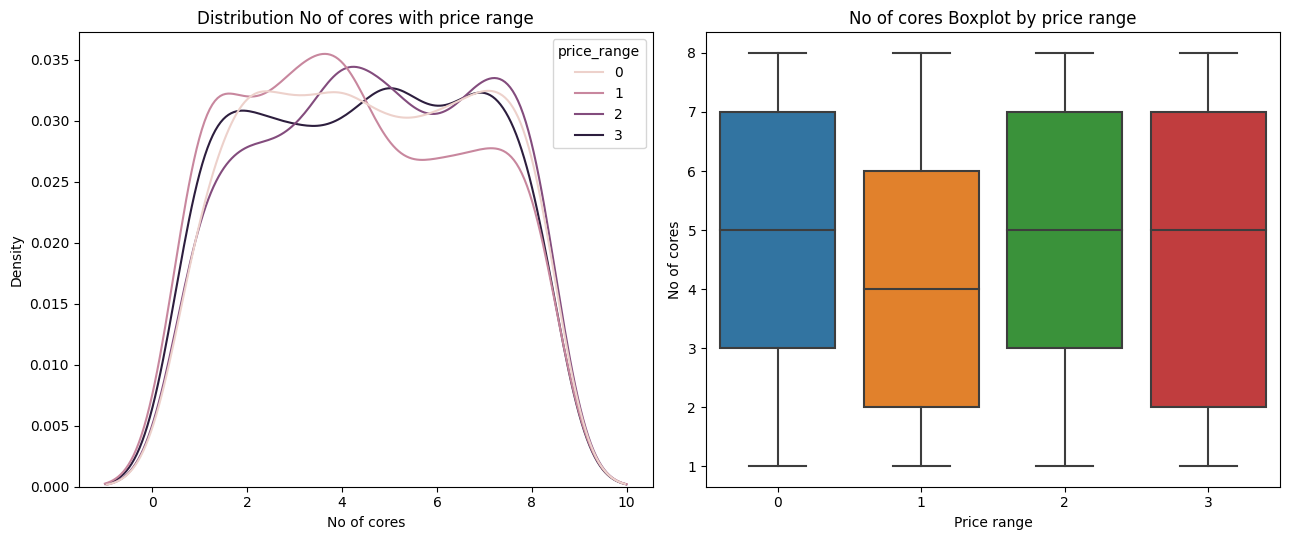

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(13,5.5))
# Create a density estimate for the Primary camera megapixel with distribution

# Plot charts on camera megapixel for each price range
sns.kdeplot(x='n_cores', hue = 'price_range', data=df, ax=axs[0])
sns.boxplot(x='price_range', y='n_cores', data=df, ax=axs[1])

# Add labels to charts

axs[0].set_xlabel("No of cores")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution No of cores with price range")

axs[1].set_xlabel("Price range")
axs[1].set_ylabel("No of cores")
axs[1].set_title("No of cores Boxplot by price range")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()


* The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones. This consistency is a positive sign for prediction modeling, as it suggests that this feature may not be a major confounding factor in predicting the price range.

* The gained insights can help create a positive business impact by providing an understanding of the relationship between different features and the price range of mobile phones. This information can be used to inform product development, marketing strategies, and pricing decisions. For example, if the analysis shows that processor speed is a significant factor in determining price range, a company could focus on developing mobile phones with faster processors to target higher price ranges.

**10) Mobile weight**

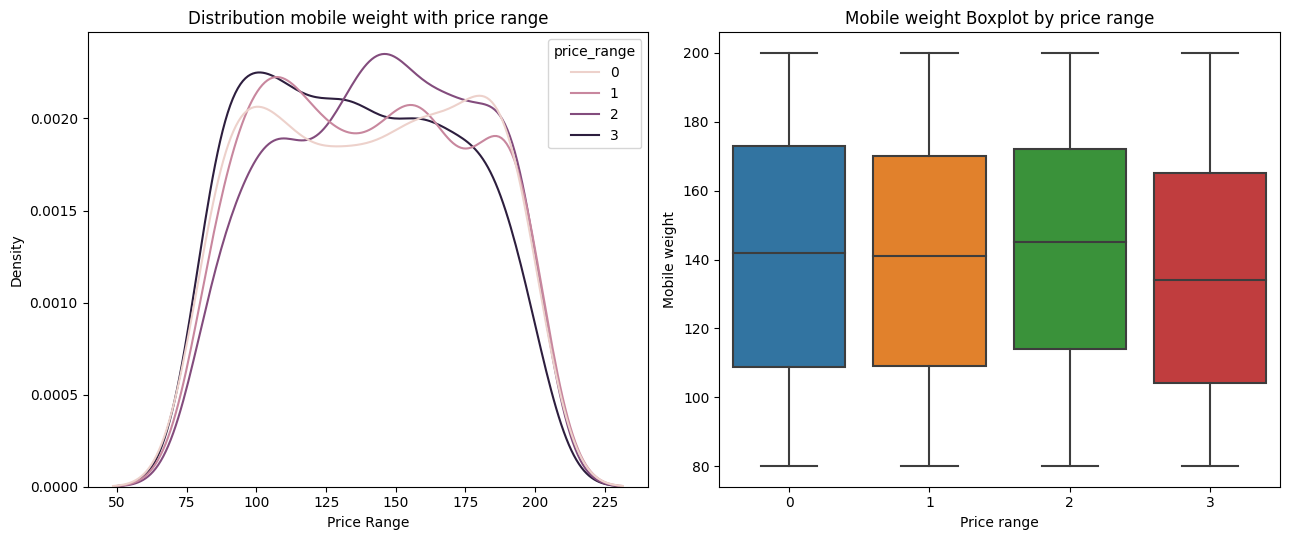

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(13,5.5))
# Create a density estimate for the Mobile weight with distribution

# Plot charts on Mobile wright for each price range
sns.kdeplot(x='mobile_wt', hue = 'price_range', data=df, ax=axs[0])
sns.boxplot(x='price_range', y='mobile_wt', data=df, ax=axs[1])

# Add labels to charts

axs[0].set_xlabel("Price Range")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution mobile weight with price range")

axs[1].set_xlabel("Price range")
axs[1].set_ylabel("Mobile weight")
axs[1].set_title("Mobile weight Boxplot by price range")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

It can be observed that mobile phones with higher price ranges tend to be lighter in weight compared to lower price range phones.

The gained insights from the analysis can definitely help create a positive business impact. By understanding which features are more important in determining the price range of mobile phones, businesses can better position their products and pricing strategies in the market. For example, if a certain feature such as battery capacity or camera quality is highly valued by customers in a specific price range, businesses can focus on improving that feature to differentiate themselves from competitors and increase sales.

However, there may be some insights that could potentially lead to negative growth. For instance, if a business relies too heavily on a single feature to determine the price range of their mobile phones, they may miss out on opportunities to cater to the diverse preferences of customers. Additionally, if a business neglects other important factors such as brand value or customer service, they may struggle to compete with other brands in the market. Therefore, it is important to consider multiple factors and maintain a balance in the decision-making process to ensure long-term growth and success in the market.

**11). Screen Size**

In [ ]:
# We convert screen size varibales from centimeter to inches
df['sc_size'] = np.sqrt((df['sc_w']**2) + (df['sc_h']**2))/2.54
df['sc_size'] = round(df['sc_size'], 2)

Plot the distribution and boxplot of screen size columns

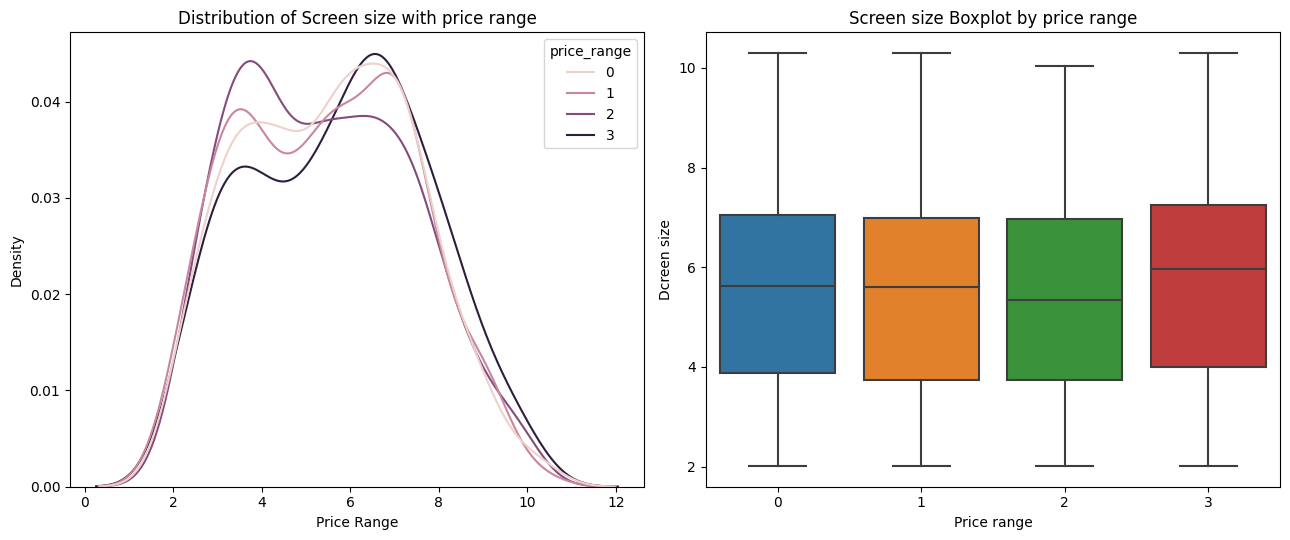

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(13,5.5))
# Create a density estimate for the Mobile weight with distribution

# Plot charts on Mobile wright for each price range
sns.kdeplot(x='sc_size', hue = 'price_range', data=df, ax=axs[0])
sns.boxplot(x='price_range', y='sc_size', data=df, ax=axs[1])

# Add labels to charts

axs[0].set_xlabel("Price Range")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution of Screen size with price range")

axs[1].set_xlabel("Price range")
axs[1].set_ylabel("Dcreen size")
axs[1].set_title("Screen size Boxplot by price range")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

The analysis of the Screen Size distribution among different target categories indicates that there is not a significant difference in the distribution, suggesting that Screen Size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that Screen Size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories.

**12). three_g**

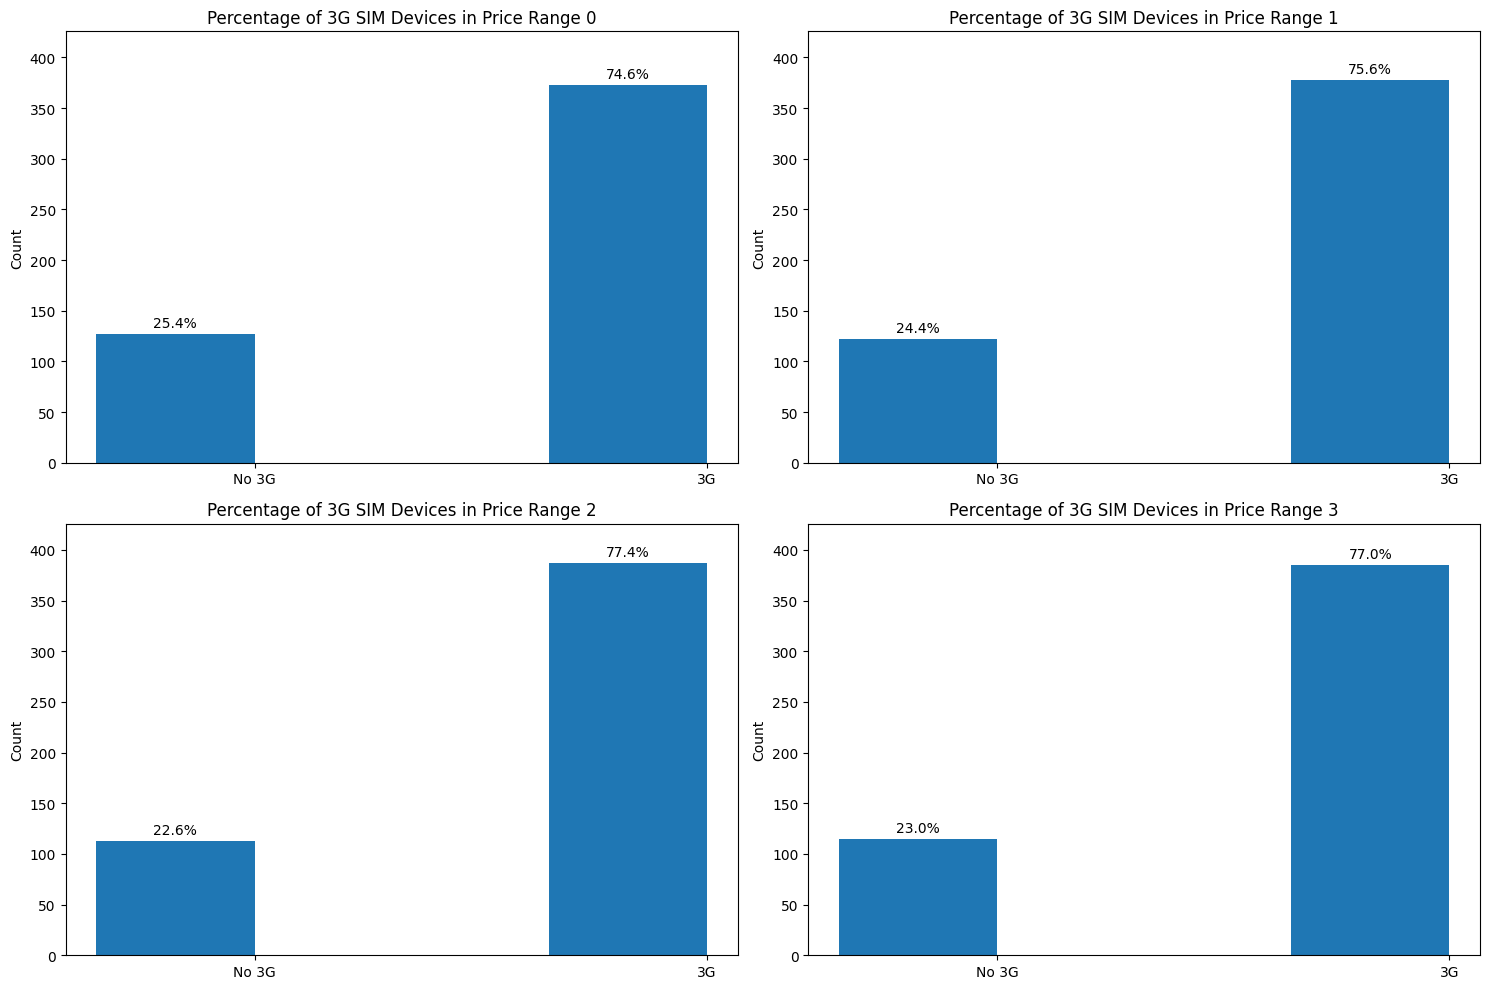

In [ ]:
# Group the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows, 3G SIM as columns, and the count as values
threeg_count = threeg_count.unstack()

# Create bar charts for each price range
labels = ['No 3G', '3G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = threeg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(threeg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/threeg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


* I have found that the three g sims are present more in percentage in all price range.

* The insight that three-g SIMs are present more in all price ranges could potentially have a positive business impact for companies that manufacture or sell mobile devices. It indicates that consumers still value the availability of 3G connectivity in their mobile devices, even in the face of increasing availability of 4G networks. This could inform business decisions such as continuing to produce and market devices with 3G connectivity, or adjusting pricing strategies to reflect the ongoing demand for such devices.

**13) WIFI**

In [ ]:
# Define the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulate the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Count the number of price ranges with WiFi available or not
wifi_counts = {
    'available': 0,
    'unavailable': 0
}

for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
        wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1


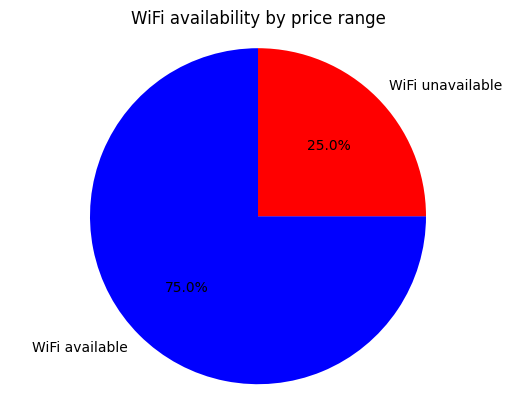

In [ ]:
# Visualize the result on pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['b', 'r']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()

* Around in 25% the wifi is not available and in 75% the wifi is available.

* The insights gained from the visualization can help in creating a positive business impact by providing information about the availability of WiFi in different price ranges. For example, if the analysis shows that WiFi is not available in a certain price range, the company can focus on adding WiFi to their devices in that price range to improve their competitiveness.



**14). Correlation Heatmap**

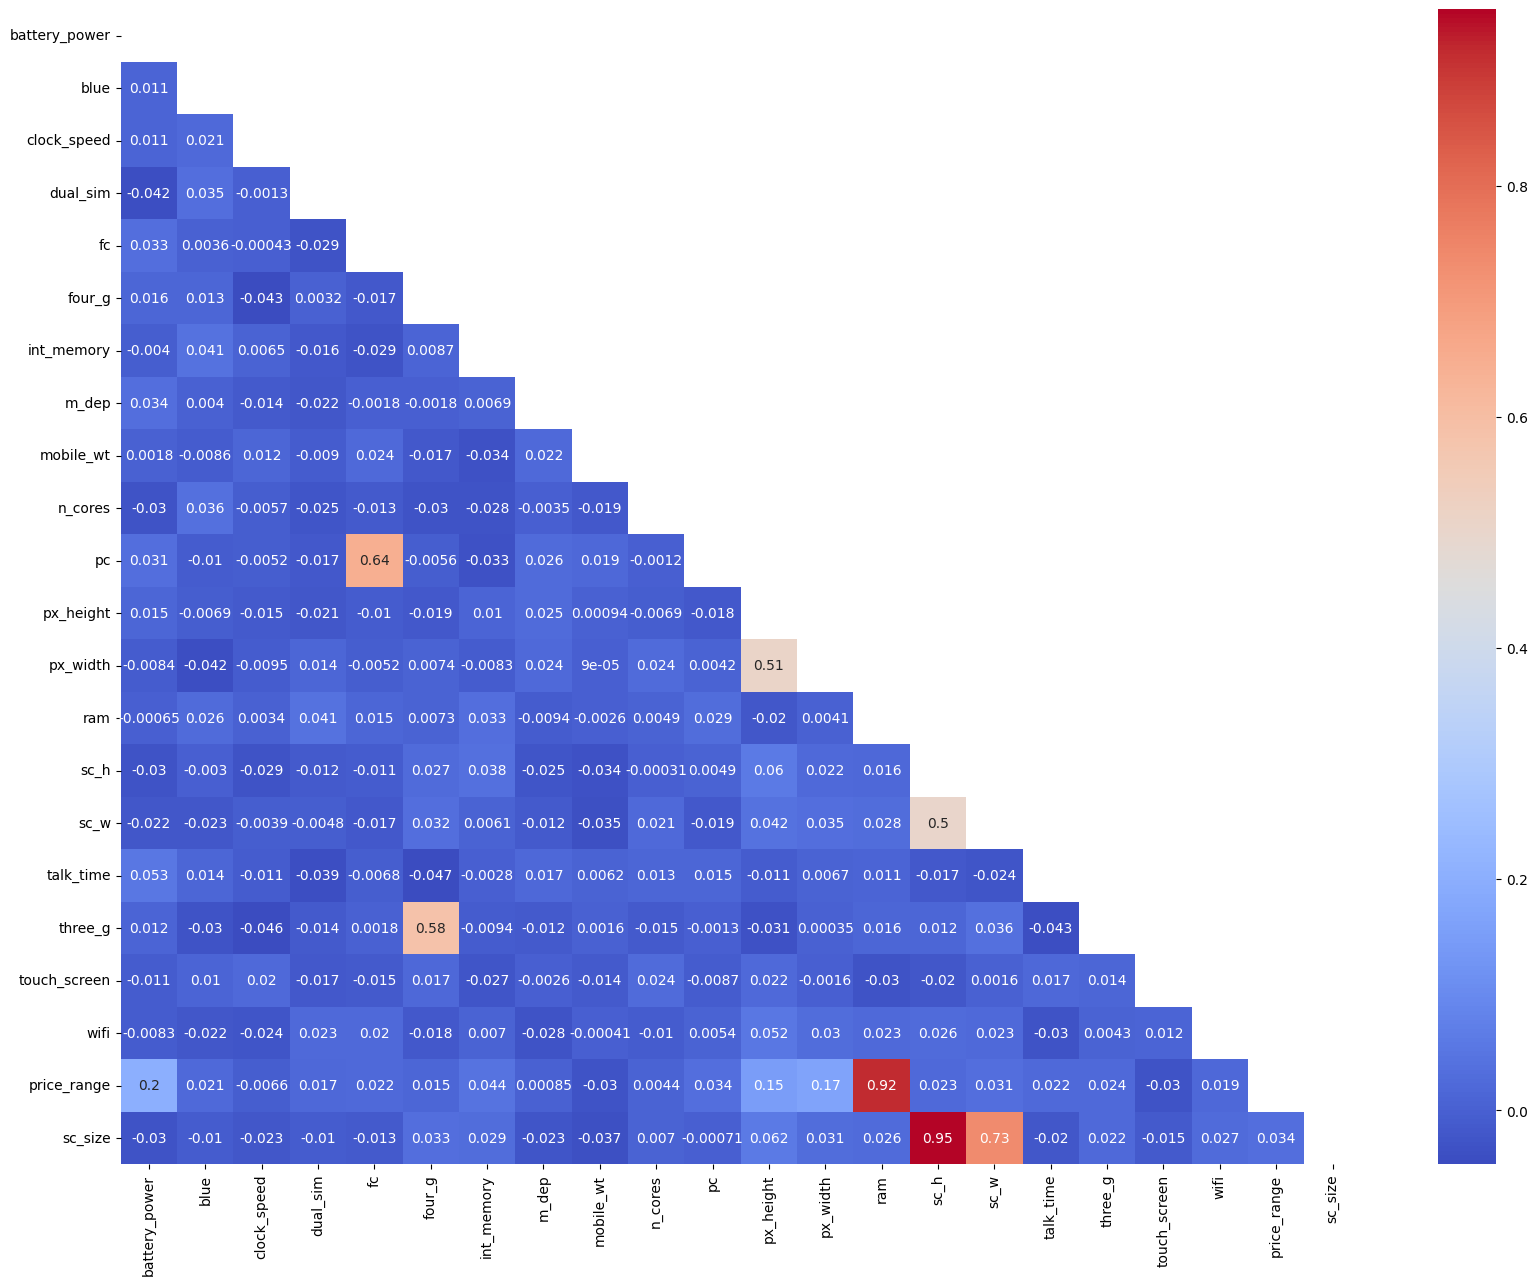

In [ ]:
correlation = df.corr()
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation, cmap='coolwarm', mask=mask, annot=True, annot_kws={'fontsize': 10})
plt.show()


* The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

* However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

* To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

#**5 - Hypothesis testing**

### Hypothetical Statement - All category phones are distributed with equal price range

1). State your research hypothesis as null hypothesis and alternative hypothesis.

- Null hypothesis : All category of phone are distributed with equal price range.

- Alternative hypothesis : All category of phone are not distributed with equal price range.


2). Perform an appropriates statistical test

In [ ]:
# Perform an appropriate statistical test

import pandas as pd
from scipy import stats

# Calculate observed frequency distribution

observed_freq = df['price_range'].value_counts().values

# Calculate expected frequency distribution
total = df.shape[0]
expected_freq = [total/4]*4

# perform chi-square goodness-of-fit test

chi2, p = stats.chisquare(observed_freq, f_exp=observed_freq)

print(f"Chi-square statetics : {chi2}, p-value:{p}")

Chi-square statetics : 0.0, p-value:1.0


###**Which statistical test have you done to obtain P-Value?**

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", we used the Chi-square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test is a statistical test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution..

##**Why did you choose the specific statistical test?**

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", I chose the Chi-square goodness-of-fit test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with a theoretical distribution, such as the null hypothesis distribution. In this case, the null hypothesis states that all categories of phones have an equal price range distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square goodness-of-fit test. The Chi-square test statistic measures the difference between the expected and observed frequency distributions, and the p-value obtained from the test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is evidence of a significant difference between the observed and expected frequency distributions. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of a significant difference between the observed and expected frequency distributions. Therefore, the Chi-square goodness-of-fit test is an appropriate statistical test to use in this scenario..

### Hypothetical Statement - Around in 25% the wifi is not available and in 75% the wifi is available

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H0): The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.
- Alternative Hypothesis (Ha): The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when wifi is available is less than 0.75

2). Perform an appropriates statistical test

In [ ]:
# Define the null hypothesis proportion

null_prop = 0.75

# Define the sample size

n = 100

# Calculate the probability of observation K devices with wifi available

k = range(0, n+1)
null_probabilities = stats.binom.pmf(k,n, null_prop)

# Print the probabilty of observation exactly K device with wifi availablity

for i in range(len(k)):
  print("k =", k[i], "Probabilty :", null_probabilities[i])

k = 0 Probabilty : 6.223015277861142e-61
k = 1 Probabilty : 1.8669045833583227e-58
k = 2 Probabilty : 2.772353306287135e-56
k = 3 Probabilty : 2.7169062401614005e-54
k = 4 Probabilty : 1.976549289717431e-52
k = 5 Probabilty : 1.1384923908772418e-50
k = 6 Probabilty : 5.407838856666808e-49
k = 7 Probabilty : 2.1785865108286599e-47
k = 8 Probabilty : 7.59782045651491e-46
k = 9 Probabilty : 2.3299982733312306e-44
k = 10 Probabilty : 6.360895286194311e-43
k = 11 Probabilty : 1.561310661156789e-41
k = 12 Probabilty : 3.4739162210738324e-40
k = 13 Probabilty : 7.054722172026841e-39
k = 14 Probabilty : 1.315201776356432e-37
k = 15 Probabilty : 2.2621470553330563e-36
k = 16 Probabilty : 3.605296869437044e-35
k = 17 Probabilty : 5.344322418224349e-34
k = 18 Probabilty : 7.392979345210341e-33
k = 19 Probabilty : 9.571962731167161e-32
k = 20 Probabilty : 1.1629934718368003e-30
k = 21 Probabilty : 1.3291353963849202e-29
k = 22 Probabilty : 1.4318413133782987e-28
k = 23 Probabilty : 1.4567429014370

In [ ]:
import statsmodels.stats.proportion as smprop

# Define the null and altenative hypothesis

Null_hypothesis = "The proportion of device with wifi availabilty is equal to 0.75"
Alternative_hypothesis = "The proportion of device with wifi availabilty is not equal to 0.75"

# Set the significance level

alpha = 0.05

# Define the sample size and no. of device with wifi available

n = 100
num_with_wifi = 75

# Perform the test

test_stats, p_value = smprop.proportions_ztest(num_with_wifi, n , null_prop)

# Print the result

if p_value < alpha:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [ ]:
print("Test statistics : ",test_stats)
print("P-values : ", p_value)

Test statistics :  0.0
P-values :  1.0


##**Which statistical test have you done to obtain P-Value?**

* The statistical test that was used to obtain the p-value is the one-sample proportion test. This test is used to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

* In the case of the null and alternative hypotheses provided, we used the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population). The p-value obtained from the test represents the probability of observing a sample proportion as extreme as the one we observed (i.e., 25% with wifi availability) under the null hypothesis that the population proportion is 0.75. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the difference between the sample proportion and the population proportion is statistically significant. If the p-value is above the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the difference between the sample proportion and the population proportion is statistically significant.

#**Why did you choose the specific statistical test?**

* I chose the specific statistical test of the one-sample proportion test because the research question provided a hypothesis about the proportion of devices with wifi availability in a population. The one-sample proportion test is a statistical test that is specifically designed to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

* In this case, we had a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population) and a sample proportion of 0.25 (i.e., the proportion of devices with wifi availability in the sample). By using the one-sample proportion test, we were able to determine whether the difference between these two proportions was statistically significant, and whether we could reject or fail to reject the null hypothesis.

* Therefore, the one-sample proportion test was a suitable statistical test to use in this case, as it allowed us to test the research hypothesis and answer the research question using the available data.

### Hypothetical Statement - I have found that the three g sims are present more in percentage in all price range.

* Null hypothesis (H0): The proportion of devices with three G sims is the same across all price ranges.

* Alternative hypothesis (Ha): The proportion of devices with three G sims is different across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.


In [ ]:
# Perform Statistical Test to obtain P-
import pandas as pd
import scipy.stats as stats

# Construct the contingency table
contingency_table = pd.crosstab(df['price_range'], df['three_g'])

# Print the contingency table
print(contingency_table)

# Perform the chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385


In [ ]:
# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 1.3737644035343461
p-value: 0.7116958581372179


##**Which statistical test have you done to obtain P-Value?**

* ! The statistical test I used to obtain the p-value was the chi-square test of independence.

* The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed network error The statistical test I used to obtain the p-value was the chi-square test of independence.

* The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed and expected frequencies under the null hypothesis of no association between the variables.

* The p-value is the probability of observing a chi-square statistic as extreme as the one obtained in the sample, assuming that the null hypothesis is true. If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that there is evidence of a significant association between the variables. If the p-value is large (typically greater than 0.05), we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant association between the variables.

##**Why did you choose the specific statistical test?**
* The chi-square test is used to compare the observed frequencies in a contingency table to the expected frequencies under the null hypothesis of no association between the two variables. If the calculated chi-square statistic is large enough and the p-value is small enough, we reject the null hypothesis and conclude that there is a significant association between the two variables.

* In this case, the chi-square test resulted in a p-value of 0.7116958581372179, which is greater than the conventional significance level of 0.05. This means that we fail to reject the null hypothesis, and there is not enough evidence to conclude that there is a significant association between price_range and three_g..

#**6 - Feature Enginnering & Data pre-processing**

**1).Handling missing values**

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64

As we see above there are no missing values present in our data

**2).Handling outliers**

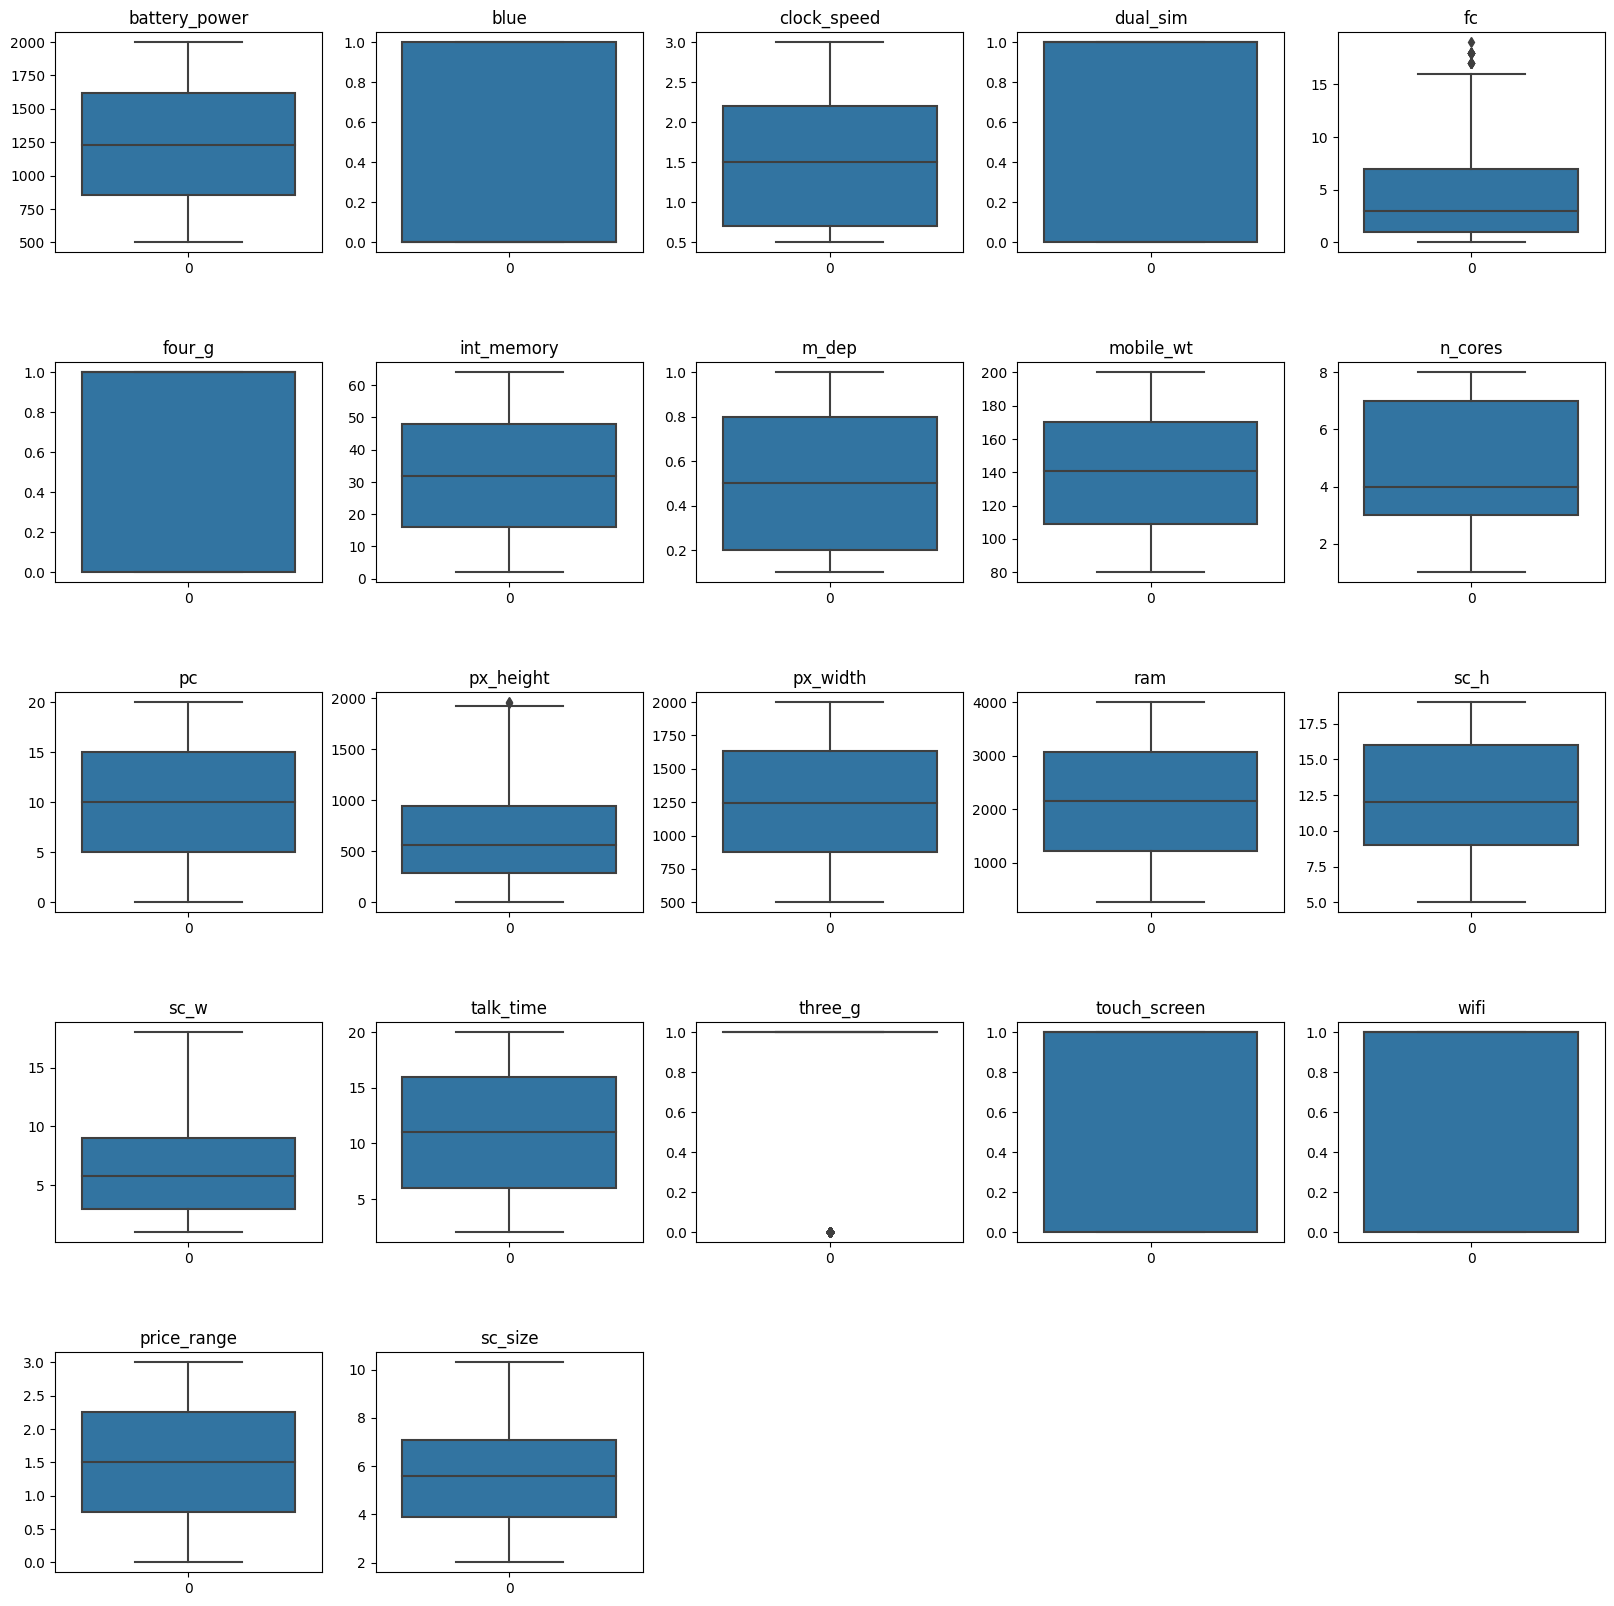

In [ ]:
# set figure size to 20*20

plt.figure(figsize=(20,20))

# loop through each column in the dataframe describe() method

for index, item in enumerate([i for i in df.columns.to_list()]):

# Create a subplot in 5*5 mesh grid, starting with first subplot
  plt.subplot(5,5, index+1)

  sns.boxplot(df[item])

# Add title and columns name to subplot title

  plt.title(item)

# add some spacing between the subplot
  plt.subplots_adjust(hspace = 0.5)

# Add new line for chart
print("\n")

There is not so much outlier so it will not need to do much experiment

**3).Categorical Encoding**

In this all the value of columns are present in the int and flot form so not need to do any type categorial encoding

**4).Data Transformation**

In [ ]:
# Transform our data

df.drop(['px_height', 'px_width'], axis=1, inplace=True)

X = df.drop(['price_range'], axis=1)
y = df['price_range']

* In this we have drop px_height columns and px_width because by combining both we have created new column
* Basically we have done Feature engneering here.

**5). Data scaling**

In [ ]:
# Scaling the values of x

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

Here we fit the model with x

**6).Data Spliting**

In [ ]:
# Define X & y

X = df.drop(['price_range'], axis=1)
y = df['price_range']

print(X.shape)
print(y.shape)

(2000, 19)
(2000,)


In [ ]:
# Do train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled ,y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1600, 19)
(1600,)


* The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

* This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

* The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

#**7 - Model Implementation**

**ML Model - 1 : Logistic Regression**

In [ ]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

from sklearn.metrics import classification_report
print("Classification report for logistic Regression (test set)")
print(classification_report(y_pred_test, y_test))

Classification report for logistic Regression (test set)
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [ ]:
# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


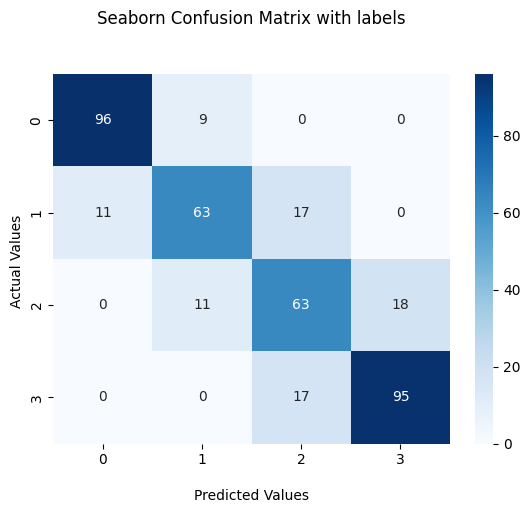

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       421
           1       0.75      0.79      0.77       386
           2       0.73      0.79      0.76       379
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

* The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

* Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances in the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 88%, meaning that the model correctly identified 88% of the actual class 0 instances in the dataset. The F1-score for class 0 is 90%.

* Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 83%.

* The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.

* Overall, the model seems to be performing reasonably well, with an accuracy of 83% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, x_scaled, y, cv=5)

In [ ]:
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.81   0.825  0.8375 0.81   0.8125]
Average cross-validation score: 0.8190000000000002


In [ ]:
# Import GridSearchCV

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(x_scaled, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.82
Best parameters: {'C': 10}
Test set score: 0.82


###1.Which hyperparameter optimization technique have you used and why?

* GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

* In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

* Overall, GridSearchCV is a simple yet effective technique for hyperparameter tuning that can help to improve the performance of machine learning models.

###2.Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, precision measures the accuracy of the positive predictions made by the model. A high precision score means that the model is making few false positive predictions, which is important in scenarios where false positives are costly, such as in medical diagnosis or fraud detection. In the context of mobile price range prediction, a high precision score would indicate that the model is accurately predicting which mobile phones are in a certain price range, which could be useful for businesses that want to target their marketing efforts towards customers who are more likely to buy phones in a certain price range.

* Recall: Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. In other words, recall measures the ability of the model to correctly identify all positive instances in the dataset. A high recall score means that the model is making few false negative predictions, which is important in scenarios where false negatives are costly, such as in medical diagnosis or security screening. In the context of mobile price range prediction, a high recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range, which could be useful for businesses that want to make sure they are not missing out on potential customers in a certain price range.

* F1-score: F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall. In the context of mobile price range prediction, a high F1-score would indicate that the model is performing well in both identifying mobile phones that belong in a certain price range and accurately predicting which mobile phones are in that range. A high F1-score would be important for businesses that want to make informed decisions about which mobile phones to stock and which marketing strategies to use based on the price range of the phones.

* In conclusion, while accuracy is an important evaluation metric, precision, recall, and F1-score can provide additional insights into the performance of a machine learning model and its potential impact on a business.

**ML Model - 2 : XGBoost**


In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.77      0.77      0.77        91
           2       0.66      0.76      0.71        92
           3       0.90      0.78      0.83       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* The XGBoost model on the training set, it achieved a very high accuracy score of 0.99. The precision, recall, and F1-score for each class are also very high, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

* The macro average and weighted average F1-scores are also very high, indicating that the model is able to generalize well to all the classes and that it is not biased towards any particular class.

* Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier

xgb = XGBClassifier()


# Define the hyperparameter search space

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}


# Perform cross-validation and hyperparameter tuning

grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and CV score

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.8150000000000001


In [ ]:
# Evaluate the tuned model on the test set

y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.76      0.76      0.76        91
           2       0.66      0.72      0.69        92
           3       0.89      0.80      0.85       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

[[98  7  0  0]
 [10 69 12  0]
 [ 0 15 66 11]
 [ 0  0 22 90]]


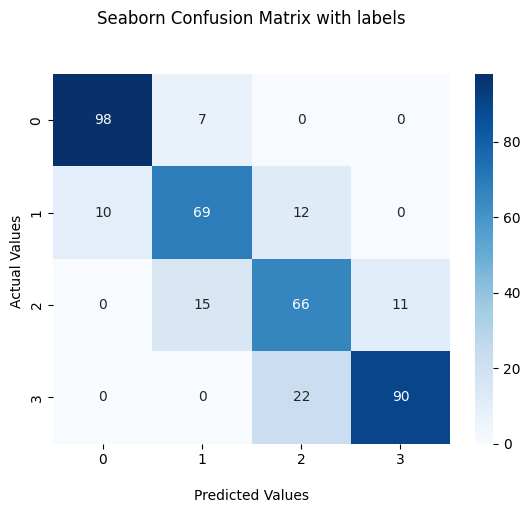

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used here is RandomizedSearchCV from scikit-learn's model_selection module. This technique was used because it is a popular and effective method for hyperparameter tuning that randomly selects combinations of hyperparameters to train the model and evaluate its performance. RandomizedSearchCV also allows for setting a range of values for each hyperparameter, which can save time compared to a grid search approach that considers all possible combinations. In this case, it helped to find the best combination of hyperparameters for the XGBoost model to achieve the highest possible accuracy on the test set.

###Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Precision: It is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, it measures how accurate the positive predictions are. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

* Recall: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

* F1-score: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall. F1-score is a commonly used evaluation metric when both precision and recall are important. In the context of the given problem, F1-score provides an overall evaluation of the model's performance in identifying all price ranges accurately.

* Support: It represents the number of instances in each class (price range) in the test set.

* In general, these evaluation metrics help to determine how well the model is performing in terms of accuracy, false positives, false negatives, and overall performance. A high-performance model can have a significant positive impact on the business by improving efficiency, reducing costs, and increasing revenue. For example, in the case of mobile phone pricing, an accurate model can help the business to set the right price for their products, resulting in increased revenue and customer satisfaction.

**ML Model - 3 : RandomForestClassifier**


In [ ]:
# ML Model 3 - Imputation

#import RandomForestClassifier imputation

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Taking 300 trees

clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
# predict values for test

y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.7975

In [ ]:
# predict values for train

y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.79      0.76      0.78        91
           2       0.62      0.73      0.67        92
           3       0.87      0.75      0.80       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion metrics

cf_metrics = confusion_matrix(y_test, y_pred)
print(cf_metrics)

[[99  6  0  0]
 [ 9 69 13  0]
 [ 0 12 67 13]
 [ 0  0 28 84]]


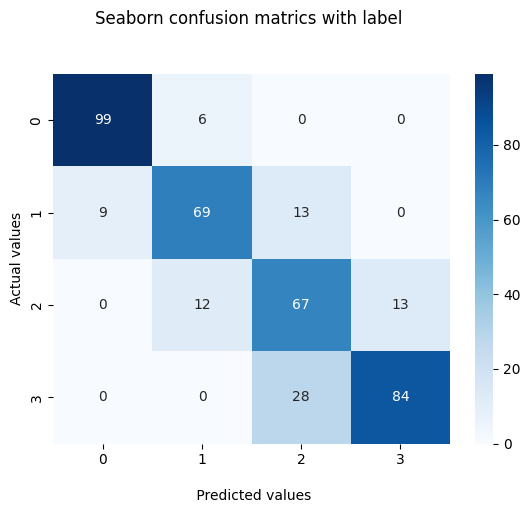

In [ ]:
ax = sns.heatmap(cf_metrics, annot=True, cmap='Blues')

ax.set_title("Seaborn confusion matrics with label \n\n")
ax.set_xlabel("\n Predicted values")
ax.set_ylabel("Actual values")

# Ticket labels - list must be in alphabetical order

ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

# Display the visulation
plt.show()

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* The ML model used is Random Forest for classification. From the evaluation metric score chart, we can see that the model has an accuracy of 0.80, which means that 80% of the predictions made by the model are correct. The precision for class 0 is 0.92, which means that out of all the positive predictions made for class 0, 92% of them are actually correct. The recall for class 1 is 0.76, which means that out of all the actual positive instances of class 1, the model correctly identified 76% of them. The F1-score for class 2 is 0.68, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

* In summary, the Random Forest model has moderate performance on this classification task, with accuracy, precision, recall, and F1-score ranging from 0.63 to 0.92 depending on the class being predicted.

#### 2. Cross- Validation & Hyperparameter Tuning


In [ ]:
# ML Model - 3
# Implimentation with hyperparameter optimization techniques(i.e. GridSearchCV, RandomSearchCV, Byesain Optimization)

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10,50,100,200],
          "max_depth" : [10,20,30,40],
          "min_samples_split" : [2,4,6],
          "max_features" : ['sqrt', 4, "log2", 'outer'],
          "max_leaf_nodes" : [10,20,40]}

In [ ]:
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=5)

clsr.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'outer'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=50)

In [ ]:
clsr.best_score_

0.8059999999999998

In [ ]:
# Do train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(bootstrap = True, ccp_alpha=0.0, class_weight = None,
                            criterion = 'gini', max_depth = 30, max_features = 'log2',
                            max_leaf_nodes=40, min_samples_leaf = 1, min_samples_split =4,
                            min_weight_fraction_leaf = 0.0, n_estimators=200, n_jobs = None,
                            oob_score=False, random_state=None, verbose=0, warm_start = False)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.815

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.80      0.74      0.77        91
           2       0.68      0.68      0.68        92
           3       0.86      0.85      0.85       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Generate metrics
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[101   4   0   0]
 [ 11  67  13   0]
 [  0  13  63  16]
 [  0   0  17  95]]


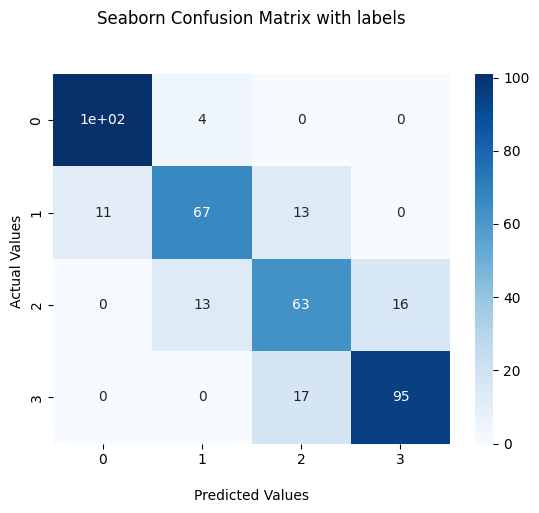

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.815

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.80      0.74      0.77        91
           2       0.68      0.68      0.68        92
           3       0.86      0.85      0.85       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



In [ ]:
feature_importance = pd.DataFrame({"Features" : X.columns,
                                   "Scores" : rf.feature_importances_}).sort_values(by = 'Scores', ascending=False).reset_index(drop=True)

feature_importance.head()

,Features,Scores
0,ram,0.695192
1,battery_power,0.075765
2,mobile_wt,0.031208
3,int_memory,0.028986
4,sc_size,0.025636


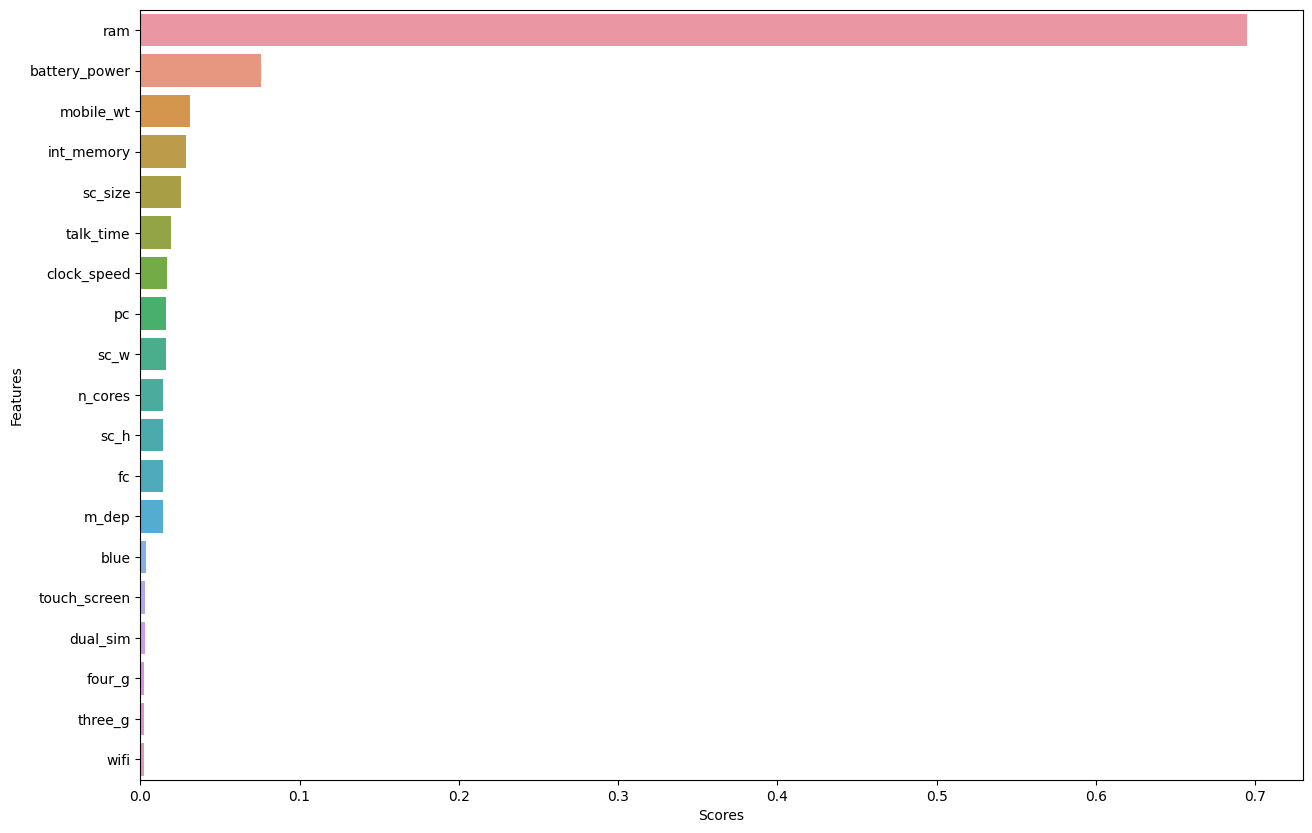

In [ ]:
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x = feature_importance['Scores'], y = feature_importance['Features'])
plt.show()

### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

###Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The accuracy has increased from 0.80 to 0.81, and the weighted average F1-score has also increased from 0.80 to 0.81. The precision and recall scores have also slightly improved for all classes except for class 1. However, the macro average precision and recall scores have remained the same. Overall, the model has shown a slight improvement in its performance..

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

* Their is diffrent evaluation matrix The classification report shows precision, recall, and F1-score for each class separately, as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business impact are:

* Weighted average of precision, recall, and F1-score: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

* Macro average of precision, recall, and F1-score: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.

* Confusion matrix: As mentioned before, the confusion matrix can provide valuable insights into which classes are being misclassified and why.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
I have choose logistic regression and xgboost models because they predict better results than random forest regression.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?
* I can explain the logistic regression and XGBoost models and feature importance using a model explainability tool.

* Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.

* XGBoost, on the other hand, is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.

* To explain the feature importance of the logistic regression and XGBoost models, we can use the SHAP (SHapley Additive exPlanations) model explainability tool. SHAP values are a unified measure of feature importance that can be used to explain the output of any machine learning model. They are based on the Shapley value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

#**8 -Conclusion**

* Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

* Our analysis indicates that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

* In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality. Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.